count    1000.000000
mean       -0.022364
std         0.989596
min        -3.182495
25%        -0.677683
50%        -0.041657
75%         0.637597
max         3.113778
dtype: float64


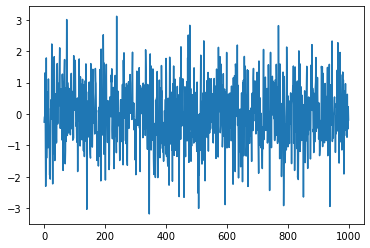

In [1]:
from random import gauss
from pandas import Series
import matplotlib.pyplot as plt

series = [gauss(0.0, 1.0) for i in range(1000)]
# random.gauss(평균, 표준편차) : 가우스 분포의 난수 반환.
series = Series(series)
# Series : 데이터프레임 하위 자료형. 1개 열->시리즈, 시리즈 모임->데이터프레임
print(series.describe())
series.plot()
plt.show()

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from pmdarima.arima import auto_arima
from pmdarima.arima import ndiffs

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
data = pd.DataFrame([series])
data = data.transpose()
data = data.rename(columns={
    0:'y'
})
data

,y
0,-0.258020
1,-0.088756
2,-0.094781
3,1.310684
4,-0.334828
...,...
995,0.628176
996,-0.257875
997,-0.477307
998,0.231304


In [8]:
model = auto_arima(data, d = 0, m=12, seasonal = True, trace = True)
model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.39 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2819.960, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2823.371, Time=0.29 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2823.425, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2818.471, Time=0.06 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=2821.742, Time=0.22 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=2821.767, Time=0.23 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2821.592, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2821.622, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2823.235, Time=0.44 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12]          
Total fit time: 6.322 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [9]:
model = auto_arima(data, d = 0, m=52, seasonal = True, trace = True)
model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=25.11 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2819.960, Time=0.13 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=2823.279, Time=3.00 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2823.277, Time=2.09 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2818.471, Time=0.04 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=2821.599, Time=2.27 sec
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=2821.567, Time=2.23 sec
 ARIMA(0,0,0)(1,0,1)[52] intercept   : AIC=2822.812, Time=4.56 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=2821.592, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=2821.622, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=2823.235, Time=0.43 sec

Best model:  ARIMA(0,0,0)(0,0,0)[52]          
Total fit time: 40.151 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [10]:
model7 = auto_arima(data, d = 0, m=7, seasonal = True, trace = True)
model7.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=2821.206, Time=3.15 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2819.960, Time=0.12 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2822.795, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2822.809, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2818.471, Time=0.08 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=2821.150, Time=0.17 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=2821.134, Time=0.17 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=2823.085, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2821.592, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=2821.622, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2823.235, Time=0.44 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7]          
Total fit time: 5.080 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [11]:
model0 = auto_arima(data, d = 0, m=1, seasonal = False, trace = True)
model0.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2816.710, Time=0.94 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2818.471, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2820.084, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2820.116, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2821.500, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2823.195, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2824.022, Time=1.08 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2815.481, Time=0.93 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2822.473, Time=0.41 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2819.945, Time=1.22 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=2817.077, Time=1.15 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2823.883, Time=0.39 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=2819.412, Time=0.99 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2817.010, Time=1.70 sec

Best model:  ARIMA(2,0,3)(0,0,0)

ARIMA(order=(2, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
print(model7.summary()) #aic가 더 낮음

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                        SARIMAX   Log Likelihood               -1408.236
Date:                Mon, 06 Feb 2023   AIC                           2818.471
Time:                        13:36:42   BIC                           2823.379
Sample:                             0   HQIC                          2820.337
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.9788      0.043     22.989      0.000       0.895       1.062
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.54   Pr

In [13]:
print(model0.summary()) #bic가 더 낮음

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 0, 3)   Log Likelihood               -1401.741
Date:                Mon, 06 Feb 2023   AIC                           2815.481
Time:                        13:36:46   BIC                           2844.928
Sample:                             0   HQIC                          2826.673
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3459      0.035    -38.611      0.000      -1.414      -1.278
ar.L2         -0.9484      0.035    -27.464      0.000      -1.016      -0.881
ma.L1          1.3713      0.048     28.462      0.0

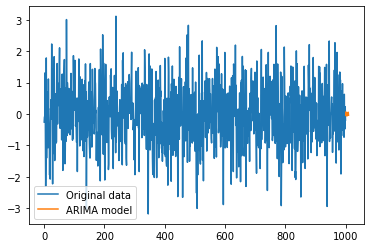

In [16]:
import matplotlib.pyplot as plt

y_predict = model0.predict(start=data.index[0],end=data.index[-1], typ='levels')

plt.plot(data, label='Original data')
plt.plot(y_predict, label='ARIMA model')

plt.legend()
plt.show()

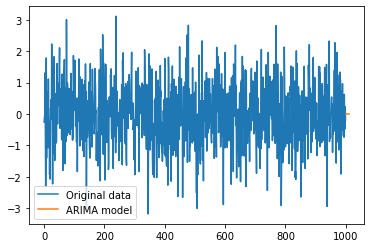

In [17]:
y_predict = model7.predict(start=data.index[0],end=data.index[-1], typ='levels')

plt.plot(data, label='Original data')
plt.plot(y_predict, label='ARIMA model')

plt.legend()
plt.show()

# 모르겟다